<a href="https://colab.research.google.com/github/ikrimaa/data-science-portfolio/blob/main/Medium_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PREPARATION SET UP

## Import Library

In [1]:
# for data wragling
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import re
# Preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
# ML Models





# Model Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import accuracy_score


## Import Data

In [2]:
uploaded = files.upload()

Saving medium-dataset.csv to medium-dataset.csv


In [78]:
data = pd.read_csv(io.BytesIO(uploaded['medium-dataset.csv']))

In [79]:
data

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,5,0,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,3,0,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,2,0,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,2,0,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,5,0,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
...,...,...,...,...,...,...,...,...,...,...,...
48052,35cdd183-8108-4f1b-a18a-80bf1ea47716,nice,5,0,4.5.1172864,2023-05-02 11:56:08,NaN,NaN,USER_EXPERIENCE,POSITIVE,4.5.1172864
48053,6e7e6ab2-d9b2-48ca-a8ac-7e839954901d,good,5,0,NaN,2023-05-02 11:46:20,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
48054,bc0abeba-1fff-4d51-9cc5-1bfa486fb98e,medium is a great platform to inspire critical...,5,1,4.5.1169363,2023-05-02 08:52:59,NaN,NaN,USER_EXPERIENCE,POSITIVE,4.5.1169363
48055,a3723a6b-cc4a-4e81-a778-a163e361a7e1,the team is good. look forward to the mainnet ...,5,0,NaN,2023-05-02 08:27:58,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN


# DATA OVERVIEW

### Dataset Attributes

In [80]:
data.shape

(48057, 11)

In [81]:
#menghitung berapaka kali setiap tipe muncul pada dataset
pd.value_counts(data.dtypes)

object    9
int64     2
dtype: int64

In [82]:
data.columns

Index(['reviewId', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'at', 'replyContent', 'repliedAt', 'predicted_category', 'sentiment',
       'appVersion'],
      dtype='object')

##### Non-numerical Features

In [ ]:
data.select_dtypes(exclude="number").head()

,reviewId,content,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
0,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,woww,NaN,2022-08-16 05:55:38,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN
1,4bbf741b-2f69-43cd-bb76-f9b5f84c83b5,let me know more details about this,4.5.1143533,2022-08-16 04:44:45,NaN,NaN,CONTENT,NEUTRAL,NaN
2,3cb1136d-e7c6-4999-aa84-fdc7bcdccf56,i've been using this for a while and there's a...,4.5.1143533,2022-08-16 04:05:27,NaN,NaN,INTERFACE,NEGATIVE,NaN
3,d6f80f05-a6e8-44f3-a380-7c59ed3d208b,good,4.5.1143533,2022-08-16 00:22:33,NaN,NaN,USER_EXPERIENCE,POSITIVE,NaN
4,eecb277c-c658-4b2d-86c9-77d3a7022cac,mjkobe,4.5.1143533,2022-08-15 20:08:25,NaN,NaN,USER_EXPERIENCE,NEUTRAL,NaN


In [ ]:
data.describe(exclude="number")

,reviewId,content,reviewCreatedVersion,at,replyContent,repliedAt,predicted_category,sentiment,appVersion
count,48057,48057,42794,48057,2477,2477,48057,48057,283
unique,48057,37241,390,48049,2127,2477,4,3,23
top,326d4bdd-8fc6-4d64-b3bf-ce393fb2ae9b,good,3.14.1001727,2020-02-17 11:21:49,"Thank you for your feedback, we'd love to hear...",2019-03-02 16:09:53,USER_EXPERIENCE,POSITIVE,4.5.1171436
freq,1,1513,1084,2,94,1,22187,36257,123


#### Unrelevant Features

In [83]:
unrelevant_features = ["reviewId","score","thumbsUpCount","reviewCreatedVersion", 'at', 'replyContent', 'repliedAt', 'predicted_category', 'appVersion']

data.drop(unrelevant_features,inplace=True,axis=1)
data.head()

,content,sentiment
0,woww,NEUTRAL
1,let me know more details about this,NEUTRAL
2,i've been using this for a while and there's a...,NEGATIVE
3,good,POSITIVE
4,mjkobe,NEUTRAL


Now let's split sentences as their class, Positive,Neutral and Negative.

In [84]:
data["sentiment"].value_counts()

POSITIVE    36257
NEUTRAL      6367
NEGATIVE     5433
Name: sentiment, dtype: int64

In [85]:
positives = data[(data["sentiment"] == "POSITIVE")]

In [86]:
negatives = data[(data["sentiment"] == "NEGATIVE")]

In [87]:
neutrals = data[(data["sentiment"] == "NEUTRAL")]

Now let's convert labels into integers, I will label negatives as 0, neutrals as 1 and positives as 2.

In [88]:
import warnings as wrn
wrn.filterwarnings('ignore')

negatives["sentiment"] = 0 

positives["sentiment"] = 2

neutrals["sentiment"] = 1



In [28]:
neutrals.head()

,content,sentiment
0,woww,1
1,let me know more details about this,1
4,mjkobe,1
13,wow,1
14,the latest update seems make the app more seam...,1


In [89]:
negatives.head()

,content,sentiment
2,i've been using this for a while and there's a...,0
9,"basic search functionality is non existent, no...",0
26,it's a week that my daily pick notifications i...,0
39,"violence is golden john fogerty violence, oh n...",0
66,i just downloaded this app because i intend to...,0


In [90]:
positives.head()

,content,sentiment
3,good,2
5,good,2
6,awesome for me who likes to read about differe...,2
7,best thing i discovered in my life. that's is ...,2
8,good project,2


In [91]:
data = pd.concat([positives,
                  neutrals,
                  negatives,
                 ],axis=0)

data.reset_index(inplace=True)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48057 entries, 0 to 48056
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      48057 non-null  int64 
 1   content    48057 non-null  object
 2   sentiment  48057 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [93]:
data.head()

,index,content,sentiment
0,3,good,2
1,5,good,2
2,6,awesome for me who likes to read about differe...,2
3,7,best thing i discovered in my life. that's is ...,2
4,8,good project,2


Finally everything is ready, we can start examining data with examining random texts.

In [94]:
import random
for i in range(1,10):
    random_ind = random.randint(0,len(data))
    print(str(data["content"][random_ind]),end="\nLabel: ")
    print(str(data["sentiment"][random_ind]),end="\n\n")

awesome
Label: 2

medium is like a library of the intimate and modern voices of our time. there is something for everyone. if you do find topics that you like to read about, you are more than welcome to write something and submit an article yourself. what's not to like about that! i read medium daily, i am a member and i would highly recommend.
Label: 2

great and easy to use
Label: 2

medium seemed good when i installed it, and it has an elegant interface. yet, what the hell? 3 free stories? i assumed some stories are premium. but no, basically all are premium. 3 stories per month is such a ridiculous thing... jeez.
Label: 0

easy to operate and read, just awesome
Label: 2

the app is okay... and it makes a good substitute for the website...
Label: 2

the only think missing is immersive mode
Label: 1

very good app , keeps me focus .
Label: 2

liveĺy anď entertaing news. very informative.
Label: 2



And let's take a look at the frequency distributions.

In [95]:
positiveFD = nltk.FreqDist(word for text in data[data["sentiment"] == 2]["content"] for word in text.lower().split())
negativeFD = nltk.FreqDist(word  for text in data[data["sentiment"] == 0]["content"] for word in text.lower().split())
neutralDF = nltk.FreqDist(word  for text in data[data["sentiment"] == 1]["content"] for word in text.lower().split())

And now we can examine most used words plots.

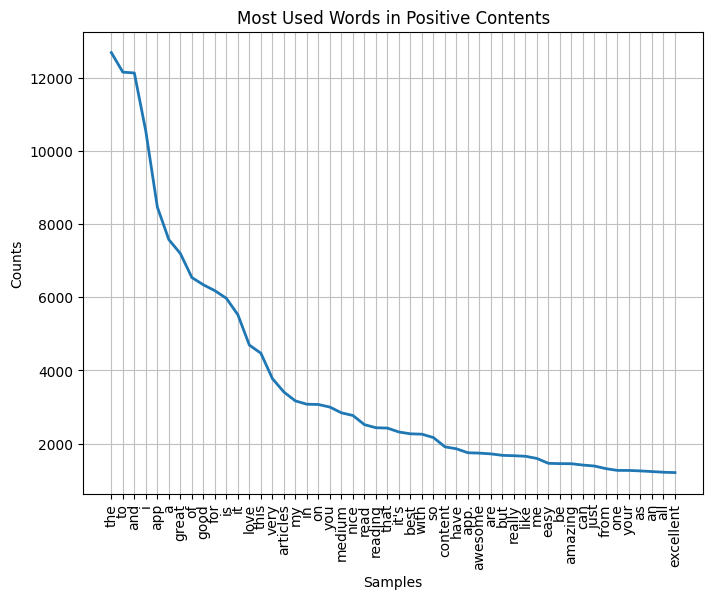

In [96]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Positive Contents")
positiveFD.plot(50)
plt.show()

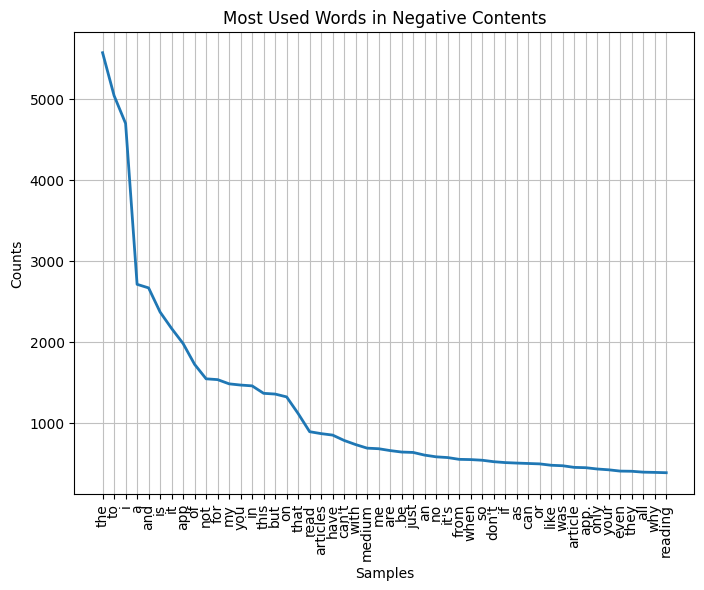

In [97]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Negative Contents")
negativeFD.plot(50)
plt.show()

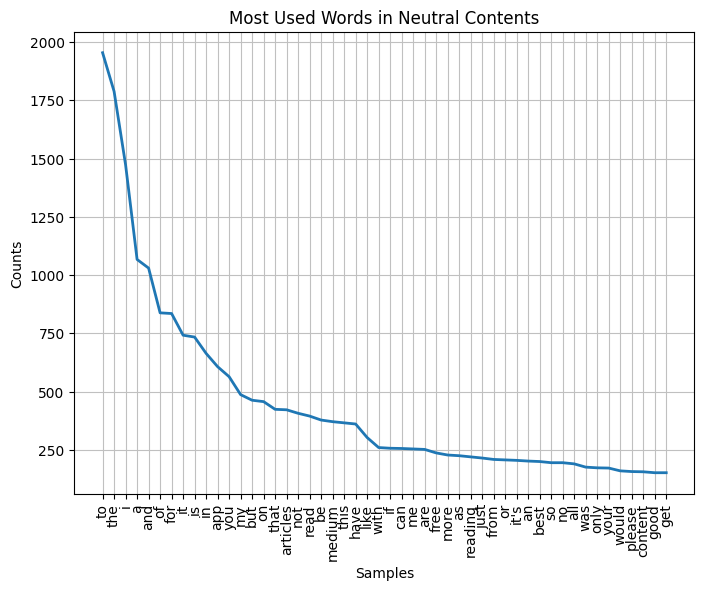

In [98]:
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Neutral Contents")
neutralDF.plot(50)
plt.show()

# PREPROCESSING

In [44]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [46]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Cleaning

In [47]:
cleanedData = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["content"]:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    cleanedData.append(text)

In [48]:
for i in range(0,5):
    print(cleanedData[i],end="\n\n")

good

good

awesome like read different topic great work developing app

best thing discovered life call nature gift wish also changed entire life thankful creator people platform changing perspective vision day day wonderful application

good project



##Bag of word

In [49]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(cleanedData)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(BOW,np.asarray(data["sentiment"]))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36042, 10000)
(12015, 10000)
(36042,)
(12015,)


# MODELLING

In [52]:
from sklearn.svm import SVC
start_time = time.time()

model = SVC()
model.fit(x_train,y_train)

end_time = time.time()
process_time = round(end_time-start_time,2)
print("Fitting SVC took {} seconds".format(process_time))

Fitting SVC took 198.51 seconds


# PREDICTING

In [53]:
predictions = model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix

print("Accuracy of model is {}%".format(accuracy_score(y_test,predictions) * 100))

Accuracy of model is 86.21722846441948%


# END TO END

In [57]:
check_result = data["content"]

In [58]:
check_result.head()

0                                                 good
1                                                 good
2    awesome for me who likes to read about differe...
3    best thing i discovered in my life. that's is ...
4                                         good project
Name: content, dtype: object

In [59]:
clean_result = []

lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data["content"]:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]
    
    # Joining
    text = " ".join(text)
    
    clean_result.append(text)

In [66]:
for i in range(100,105):
    print(clean_result[i],end="\n\n")

great app like article recommendation

nice app

nice

good

interesting learning



In [67]:
vectorizer = CountVectorizer(max_features=10000)
BOW = vectorizer.fit_transform(clean_result)

In [73]:
result_pred= model.predict(BOW)

In [75]:
result_pred

array([2, 2, 2, ..., 1, 1, 1])

In [114]:
data.head()

,level_0,index,content,sentiment
0,0,3,good,2
1,1,5,good,2
2,2,6,awesome for me who likes to read about differe...,2
3,3,7,best thing i discovered in my life. that's is ...,2
4,4,8,good project,2


In [115]:
data = data.drop(columns="level_0")

In [116]:
df1= pd.DataFrame(result_pred, columns=["pred_sentiment"])

In [117]:
data['pred_sentiment'] = df1["pred_sentiment"]

In [119]:
data.head()

,index,content,sentiment,pred_sentiment
0,3,good,2,2
1,5,good,2,2
2,6,awesome for me who likes to read about differe...,2,2
3,7,best thing i discovered in my life. that's is ...,2,2
4,8,good project,2,2


In [120]:
data['pred_sentiment'] = data['pred_sentiment'].map({ 0: 'negative', 1: 'neutral', 2:"positive" })
data.head()



,index,content,sentiment,pred_sentiment
0,3,good,2,positive
1,5,good,2,positive
2,6,awesome for me who likes to read about differe...,2,positive
3,7,best thing i discovered in my life. that's is ...,2,positive
4,8,good project,2,positive


In [122]:
data['sentiment'] = data['sentiment'].map({ 0: 'negative', 1: 'neutral', 2:"positive" })
data.head()

,index,content,sentiment,pred_sentiment
0,3,good,positive,positive
1,5,good,positive,positive
2,6,awesome for me who likes to read about differe...,positive,positive
3,7,best thing i discovered in my life. that's is ...,positive,positive
4,8,good project,positive,positive


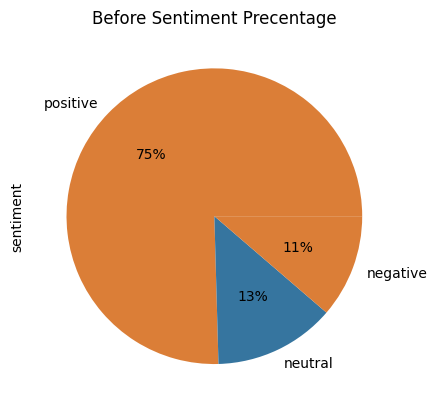

In [123]:
data['sentiment'] .value_counts().plot(title = 'Before Sentiment Precentage', kind = 'pie', autopct='%1.0f%%', colors=['#DB7E37','#36759F']);        
plt.savefig('sentiment_persen.png')

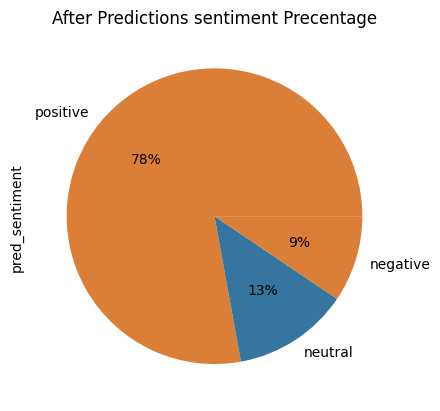

In [124]:
data['pred_sentiment'] .value_counts().plot(title = 'After Predictions sentiment Precentage', kind = 'pie', autopct='%1.0f%%', colors=['#DB7E37','#36759F']);        
plt.savefig('prediction sentiment_persen.png')